# 비지도학습 (Unsupervised Learning)

# K-means Clustering 원리 이해

* iris dataset load
* sepal length와 sepal width만으로 비지도 학습 분류해보기

In [40]:
#####################################################################
# 비지도학습 : iris 예제 (K-means Clustering)
#####################################################################
# sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드.
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* sepal_length 컬럼을 x로 sepal_with 컬럼을 y로 설정
* x, y를 컬럼으로 붙여 points 변수 생성 

In [42]:
# sepal length와 width 두 가지 feature만을 사용하도록 하겠음
# 데이터로부터 두 feature만을 뽑아내어 산점도를 그려 봄(x축-length, y축-width)
from matplotlib import pyplot as plt
x = iris.data[:, 0]   # sepal length
y = iris.data[:, 1]   # sepal width
points = iris.data[:, :2]  # x, y 좌표로 표시
points

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

* 2차원 공간에 scatter plot으로 시각화

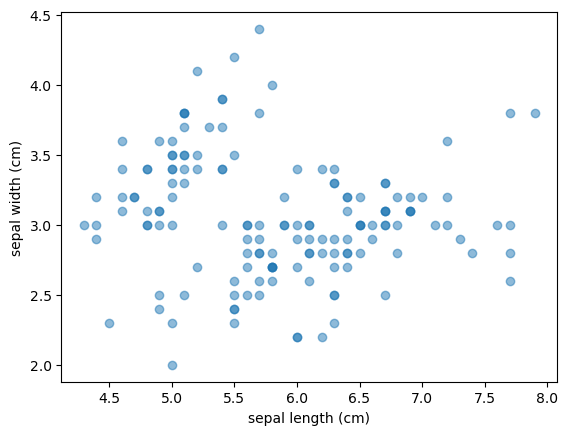

In [43]:
plt.scatter(x, y, alpha=0.5)	 # alpha – 색상의 투명도 지정(0-완전투명, 1-불투명)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

**[Step1]**
* Centroid 3개를 임의로 지정
* 2차원 공간에 시각화

In [44]:
# Iris Dataset은 원래 label이 제공되지만, label이 없다고 가정하고 K-Mean 알고리즘으로 위 # 데이터를 그룹화 함. K-Means 클러스터링 알고리즘 사용
# STEP 1: Place K Random Centroids : 제일 먼저 K 개의 centroids(중심값)를 임의로 지정
# 3가지 종이 존재하므로 K 는 3 으로 설정

k = 3

# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids_x) 
print(centroids_y) 
print(centroids)   # 3개의 centroids 포인트 생성

[5.85190946 6.06087857 4.76505518]
[4.38858731 3.69211576 2.06266766]
[[5.85190946 4.38858731]
 [6.06087857 3.69211576]
 [4.76505518 2.06266766]]


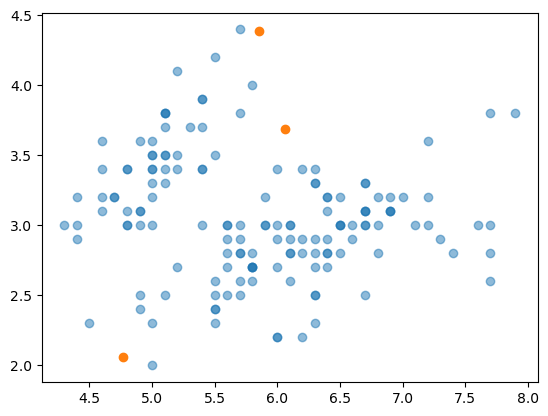

In [45]:
# centroids 는 임의로 생성한 (x, y) 좌표 3개를 갖게 됨. 
plt.scatter(x, y, alpha=0.5)	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids[:, 0], centroids[:, 1])	# centroids는 주황색으로 표시
plt.show()

**[Step2]**
* centroids에 가까운 데이터들을 할당. ‘가깝다’ 라는 것을 정량적으로 계산하기 위해 
* 각 데이터를 벡터로 간주하여 유클리드 거리를 계산.
* 두 데이터 포인트 사이의 거리를 계산하는 distance() 함수를 작성.

In [46]:
centroids

array([[5.85190946, 4.38858731],
       [6.06087857, 3.69211576],
       [4.76505518, 2.06266766]])

In [47]:
def distance(point, centroid):  
    # 각 point와 centroid 사이의 거리
    return np.sqrt(((point - centroid)**2).sum())


In [48]:
# 모든 점들과 가장 가까운 centroid 번호를 넣을 라벨 마련
labels = np.zeros(len(points))

# 150개의 자리 마련
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* 모든 point에서 3개의 centroid까지의 거리 측정하여 가장 가까운 centroid의 번호를 기록

In [49]:
# 150개의 좌표(특성)
points
points[:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [50]:
labels = np.zeros(len(points))  # 모든 점들과 가장 가까운 centroid 번호를 넣을 라벨 마련

for i, point in enumerate(points):
    distances = [distance(point, centroids[0]),   # 하나의 point에서 각 centroid까지의 거리
                 distance(point, centroids[1]),
                 distance(point, centroids[2])]
    distances = np.array(distances)   # 3개의 centroid와의 거리들
#   print(distances.argmin())
#   print(distances)
    labels[i] = distances.argmin()   # 가장 거리가 가까운(가장 값이 작은) centroid의 인덱스

In [51]:
distances    # 맨 마지막 데이터와 각 Centroid와의 거리

array([1.38941982, 0.71056747, 1.47196863])

In [52]:
labels

array([1., 2., 2., 2., 1., 0., 2., 1., 2., 2., 1., 1., 2., 2., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 0., 0.,
       2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 0., 2., 0., 2., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

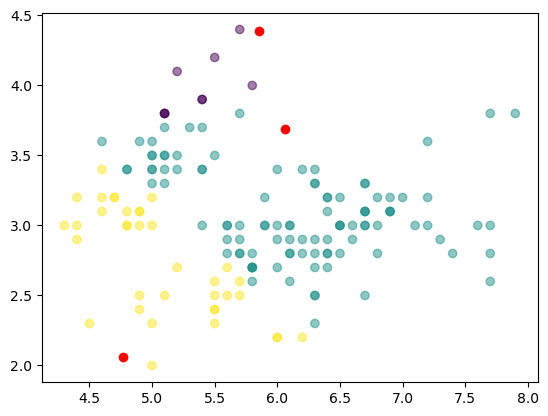

In [53]:
# 생성된 labels에는 0, 1 또는 2 가 저장되어 각 데이터(iris data)가 어느 centroid그룹에
# 속해 있는지를 나타냄. 시각화를 통해 확인.
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')	# centroid는 빨간색으로… 
plt.show()

# 데이터들이 가까운 centroid에 잘 할당되어 있지만, 처음 centroid를 선택할 때 랜덤으로 
# 선택했으므로 최적화가 필요.

In [54]:
labels

array([1., 2., 2., 2., 1., 0., 2., 1., 2., 2., 1., 1., 2., 2., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 0., 0.,
       2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 0., 2., 0., 2., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
points[labels==0].mean(axis=0)   # 0번 centroid에 소속된 점들의 평균 좌표

array([5.36666667, 3.98888889])

**[STEP 3]**
* Update Centroids - centroids를 새롭게 지정함으로써 데이터를 더 잘 그룹화 할 수 있도록 만들어야 함. 
* 기존에 지정한 centroids를 복사해두어 centroids_old 에 저장

In [56]:
# STEP 3: Update Centroids - centroids를 새롭게 지정함으로써 데이터를 더 잘 그룹화 할 수 
# 있도록 만들어야 함. 기존에 지정한 centroids를 복사해두어 centroids_old 에 저장

import copy
centroids_old = copy.deepcopy(centroids)
for i in range(k):
    centroids[i] = points[labels==i].mean(axis=0)   # 3개 그룹별 평균좌표
centroids, centroids_old

(array([[5.36666667, 3.98888889],
        [6.14761905, 3.08761905],
        [5.075     , 2.73611111]]),
 array([[5.85190946, 4.38858731],
        [6.06087857, 3.69211576],
        [4.76505518, 2.06266766]]))

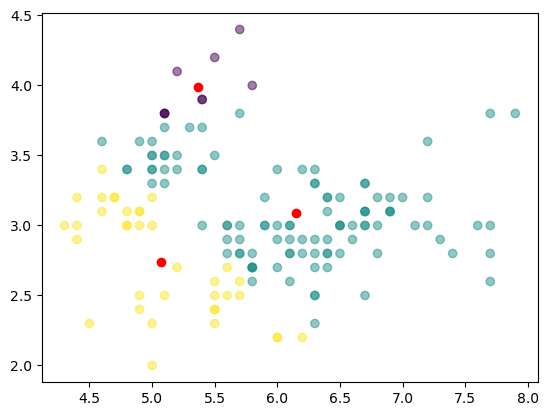

In [57]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')	# centroid는 빨간색으로… 
plt.show()

**[종합 코드]**

============================================= 실행횟수 1
# 현재 centroids =  [[5.56410741 2.73997569]
 [7.68618227 2.61271528]
 [5.50744582 2.56400238]]


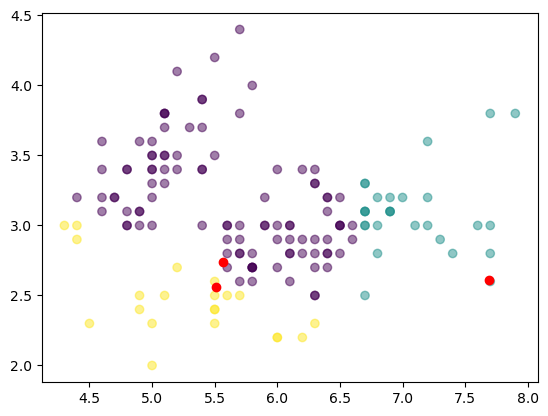

============================================= 실행횟수 2
# 현재 centroids =  [[5.61584158 3.17128713]
 [7.08214286 3.09285714]
 [5.28571429 2.46190476]]


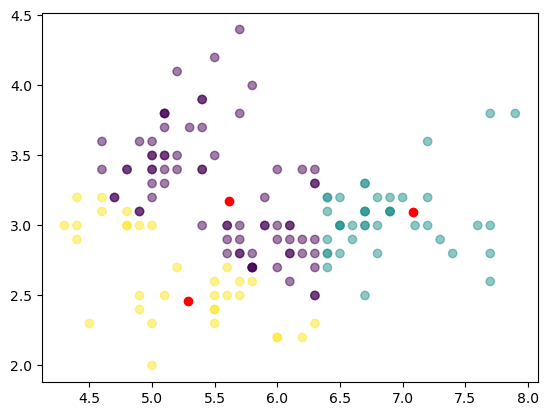

============================================= 실행횟수 3
# 현재 centroids =  [[5.54868421 3.23947368]
 [6.87619048 3.05238095]
 [5.1875     2.63125   ]]


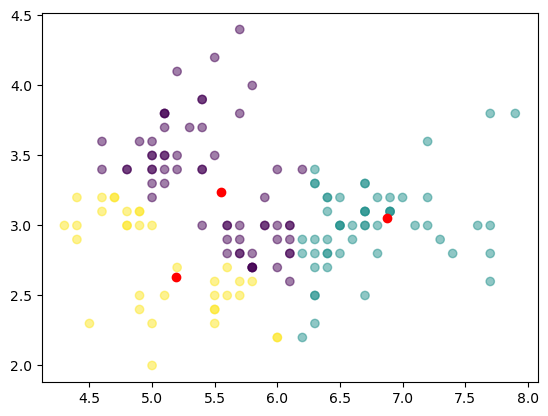

============================================= 실행횟수 4
# 현재 centroids =  [[5.47903226 3.2983871 ]
 [6.74259259 2.9962963 ]
 [5.07941176 2.71470588]]


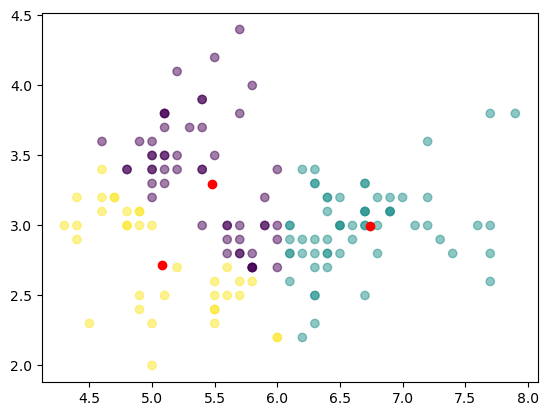

============================================= 실행횟수 5
# 현재 centroids =  [[5.41296296 3.34444444]
 [6.6704918  2.98852459]
 [5.06571429 2.73428571]]


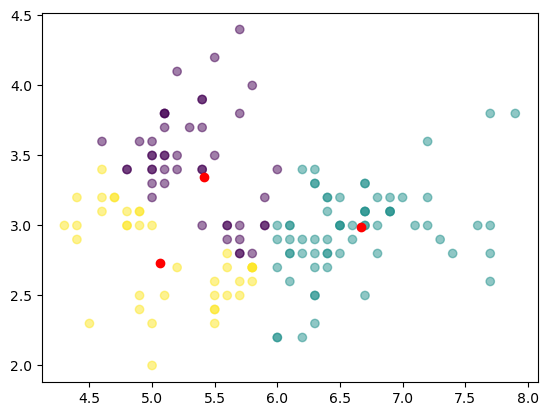

============================================= 실행횟수 6
# 현재 centroids =  [[5.33695652 3.44347826]
 [6.61969697 2.95909091]
 [5.10789474 2.76052632]]


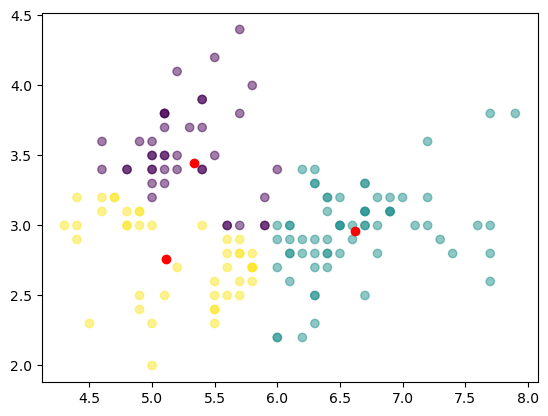

============================================= 실행횟수 7
# 현재 centroids =  [[5.27317073 3.52682927]
 [6.61969697 2.95909091]
 [5.19534884 2.76046512]]


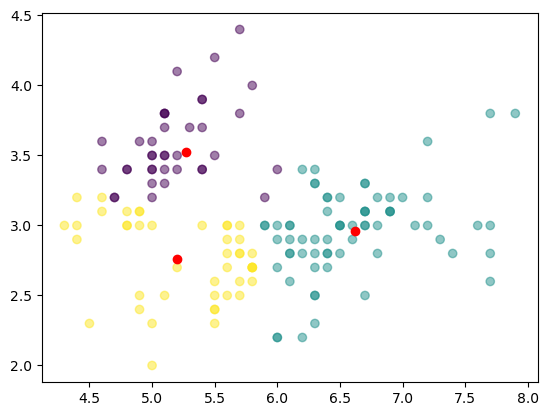

============================================= 실행횟수 8
# 현재 centroids =  [[5.18157895 3.57894737]
 [6.59852941 2.96029412]
 [5.24772727 2.75681818]]


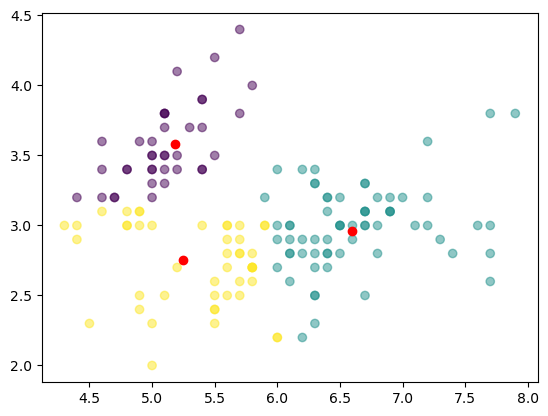

============================================= 실행횟수 9
# 현재 centroids =  [[5.10526316 3.57368421]
 [6.61818182 2.99242424]
 [5.34130435 2.72391304]]


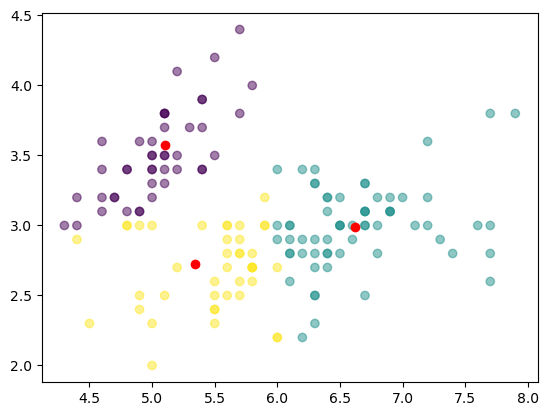

============================================= 실행횟수 10
# 현재 centroids =  [[5.04318182 3.50454545]
 [6.6390625  2.99375   ]
 [5.46904762 2.68571429]]


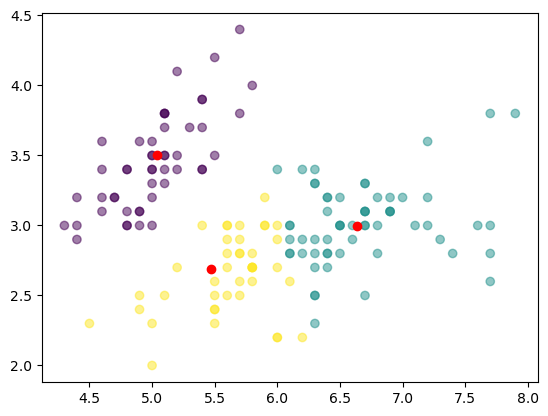

============================================= 실행횟수 11
# 현재 centroids =  [[5.01632653 3.45102041]
 [6.67666667 3.015     ]
 [5.61219512 2.64878049]]


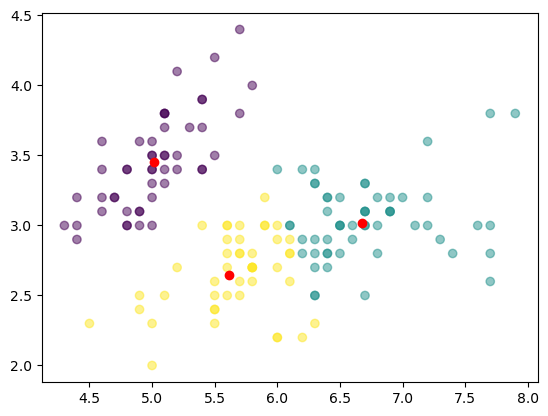

============================================= 실행횟수 12
# 현재 centroids =  [[5.01632653 3.45102041]
 [6.71428571 3.0375    ]
 [5.66       2.65333333]]


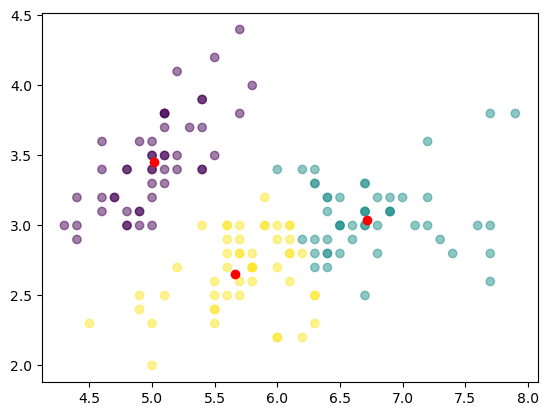

============================================= 실행횟수 13
# 현재 centroids =  [[5.01632653 3.45102041]
 [6.76470588 3.06470588]
 [5.714      2.664     ]]


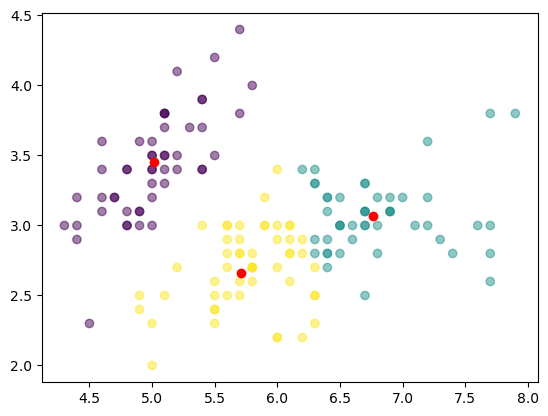

============================================= 실행횟수 14
# 현재 centroids =  [[5.006      3.428     ]
 [6.80208333 3.06875   ]
 [5.76346154 2.69038462]]


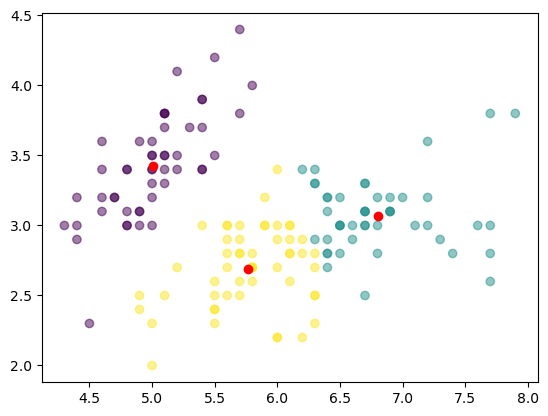

============================================= 실행횟수 15
# 현재 centroids =  [[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]


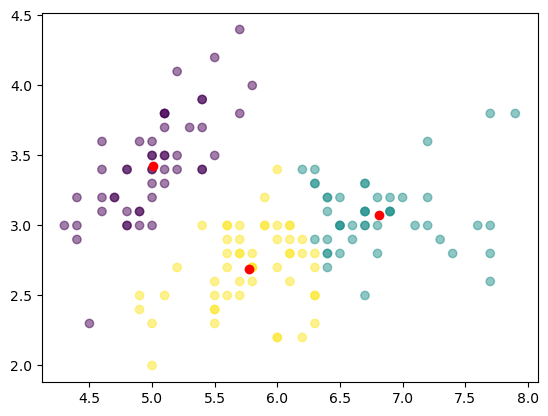

최종 centroids= [[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
최종 labels= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 2. 1. 1. 2.]


In [58]:
#####################################################################
# 비지도학습 : iris 예제 (Full code)
# 알고리즘 따라가기
#####################################################################
# sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드.
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import copy

iris = datasets.load_iris()
# sepal length와 width 두 가지 feature만을 사용하도록 하겠음
x = iris.data[:, 0]   # sepal length
y = iris.data[:, 1]   # sepal width
points = iris.data[:, :2]  # x, y 좌표로 표시

k = 3

# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))
centroids   # 3개의 centroids 포인트 생성

def distance(point, centroid):  # 각 point와 centroid 사이의 거리
    return np.sqrt(((point - centroid)**2).sum())

labels = np.zeros(len(points))  # 모든 점들과 가장 가까운 centroid 번호를 넣을 라벨 array 마련

cnt = 0
while True:
    for i, point in enumerate(points):
        distances = [distance(point, centroids[0]), 
                     distance(point, centroids[1]),
                     distance(point, centroids[2])]
        distances = np.array(distances)   # 3개의 centroid와의 거리들
    #     print(distances.argmin())
    #     print(distances)
        labels[i] = distances.argmin()   # 가장 거리가 가까운 centroid의 인덱스
    
    cnt += 1
    print("============================================= 실행횟수", cnt)
    print("# 현재 centroids = ", centroids)
    plt.scatter(x, y, c=labels, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red')	# centroid는 빨간색으로… 
    plt.show()

    centroids_old = copy.deepcopy(centroids)
    for i in range(k):
        centroids[i] = points[labels==i].mean(axis=0)
    
    if np.all(centroids == centroids_old):
        break

print("="*100)
print("최종 centroids=", centroids)
print("최종 labels=", labels)


### Clustering 검증하기

In [59]:
import pandas as pd
df = pd.DataFrame(labels, columns=['label'])
df.value_counts()

label
2.0      53
0.0      50
1.0      47
Name: count, dtype: int64

In [60]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
## iris setosa 분류 
df[:50].value_counts()

label
0.0      50
Name: count, dtype: int64

In [62]:
## iris versicolor
df[50:100].value_counts()

label
2.0      38
1.0      12
Name: count, dtype: int64

In [63]:
## iris virginica
df[100:].value_counts()

label
1.0      35
2.0      15
Name: count, dtype: int64

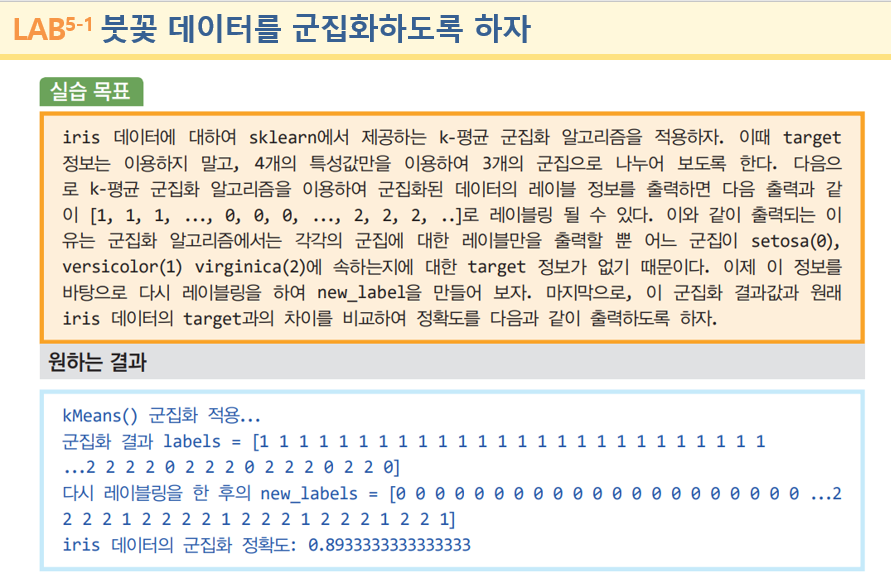

In [64]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris 
import numpy as np

iris = load_iris() 
k = len(iris.target_names)  # 몇 개의 군집으로 나눌지를 결정한다
k

3

In [65]:
print('kMeans() 군집화 적용...')
model = KMeans(n_clusters=k)
model.fit(iris.data)
labels = model.predict(iris.data)
print('군집화 결과 labels :', labels)

kMeans() 군집화 적용...
군집화 결과 labels : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
a_counts = np.bincount(labels[:50])  # array의 인덱스가 몇번 나오는지 count
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])
print('a_counts=', a_counts)   # [0, 50] : 0이 0개, 1이 50개
print('b_counts=', b_counts)   # [2, 0, 48] : 0이 2개, 1은 0개, 2는 48개 
print('c_counts=', c_counts)   # [36, 0, 14] : 0이 36개, 1은 0개, 2는 14개

a_counts= [ 0 50]
b_counts= [ 2  0 48]
c_counts= [36  0 14]


In [67]:
d = { 0: np.argmax(a_counts), 1: np.argmax(b_counts), 2 : np.argmax(c_counts)}
d

{0: np.int64(1), 1: np.int64(2), 2: np.int64(0)}

In [68]:
list(d.items())

[(0, np.int64(1)), (1, np.int64(2)), (2, np.int64(0))]

In [69]:
new_labels = np.copy(labels)
for new, old in d.items():
    new_labels[labels == old] = new

print('다시 레이블링을 한 후의 new_labels =', new_labels)

다시 레이블링을 한 후의 new_labels = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [70]:
####################################################
# sklearn으로 iris clustering (비지도학습)
####################################################
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris 
import numpy as np

iris = load_iris() 
k = len(iris.target_names)  # 몇 개의 군집으로 나눌지를 결정한다
print('kMeans() 군집화 적용...')
model = KMeans(n_clusters=k)
model.fit(iris.data)
labels = model.predict(iris.data)
print('군집화 결과 labels :', labels)

a_counts = np.bincount(labels[:50])  # array의 인덱스가 몇번 나오는지 count
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])
print('a_counts=', a_counts)   # [0, 50] : 0이 0개, 1이 50개
print('b_counts=', b_counts)   # [2, 0, 48] : 0이 2개, 1은 0개, 2는 48개 
print('c_counts=', c_counts)   # [36, 0, 14] : 0이 36개, 1은 0개, 2는 14개

d = { 0: np.argmax(a_counts), 1: np.argmax(b_counts), 2 : np.argmax(c_counts)}

new_labels = np.copy(labels)
for new, old in d.items():
    new_labels[labels == old] = new

print('다시 레이블링을 한 후의 new_labels =', new_labels)

kMeans() 군집화 적용...
군집화 결과 labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
a_counts= [50]
b_counts= [ 0 48  2]
c_counts= [ 0 14 36]
다시 레이블링을 한 후의 new_labels = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


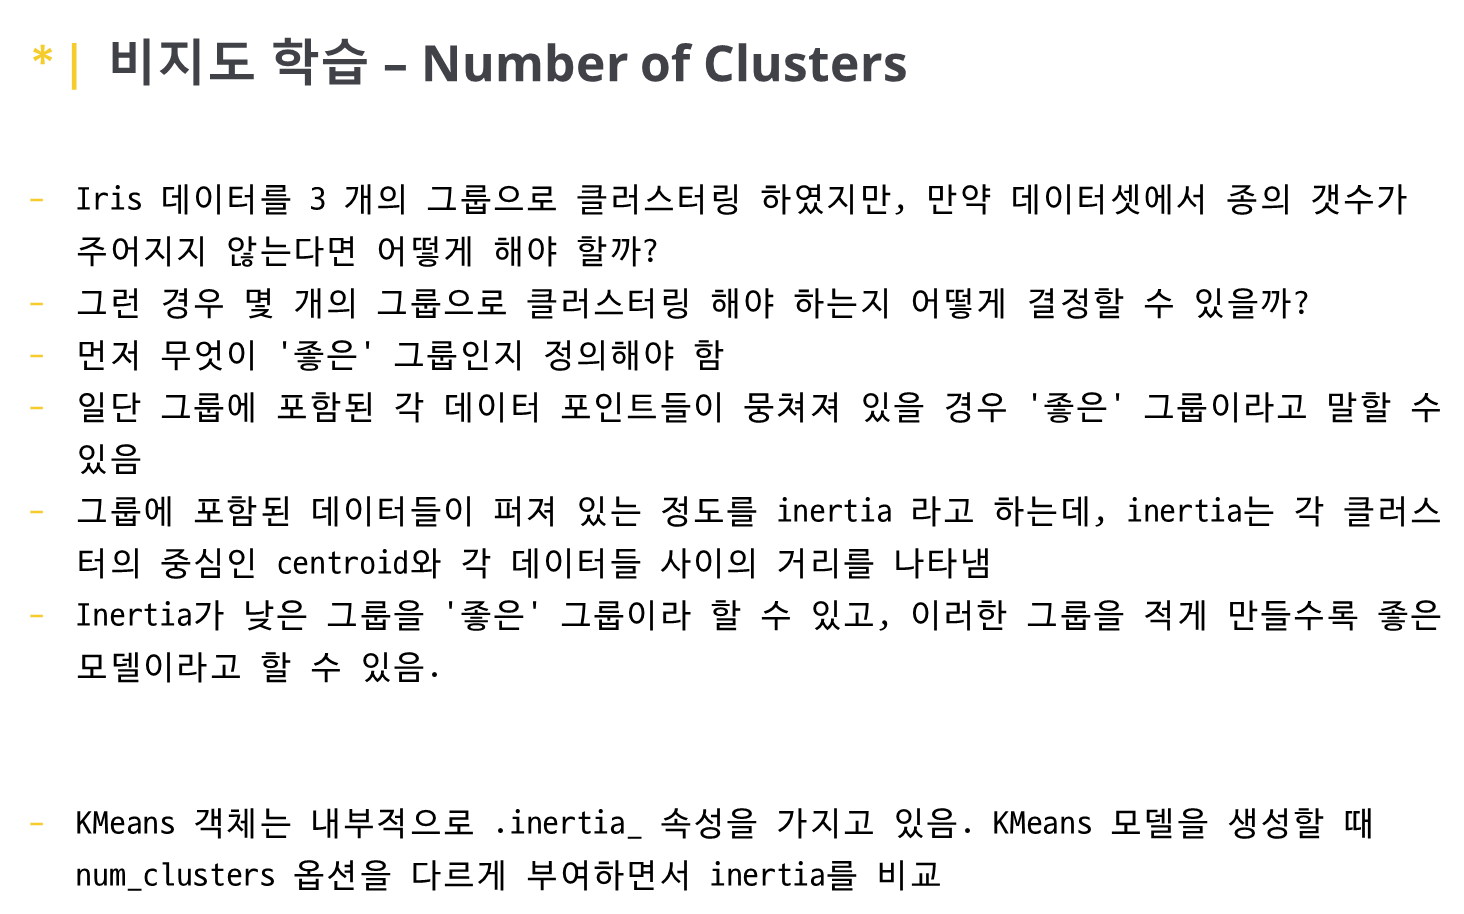

In [75]:
model.inertia_

36.540498134049855

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

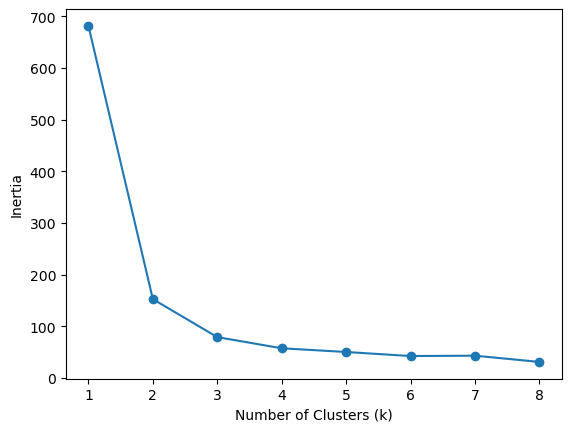

In [76]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수
inertias = []

# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(iris.data)
    inertias.append(model.inertia_)

# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
